In [10]:
import os
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.insert(0,str(Path(os.path.abspath('.')).parent.parent))


## Read data

In [11]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis/IN3136_EURAC_shared_folder"


In [12]:
validation_metrics = pd.read_csv(os.path.join(ticket_path, "validation/validation_metrics.csv"), index_col = 0)


## Clustering

In [13]:
nrmse_values = validation_metrics['nrmse_daily'].values.reshape(-1, 1)

In [14]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(nrmse_values)

labels = kmeans.labels_

validation_metrics['Cluster'] = labels

/home/lhn3e/envs/lhn_internship/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
group1 = validation_metrics[validation_metrics['Cluster'] == 0]
group2 = validation_metrics[validation_metrics['Cluster'] == 1]
group3 = validation_metrics[validation_metrics['Cluster'] == 2]

print("Group 1 Station Names:", group1.index.tolist())
print("Group 2 Station Names:", group2.index.tolist())
print("Group 3 Station Names:", group3.index.tolist())


Group 1 Station Names: ['camborne', 'carpentras', 'budapest_lorinc', 'magurele_mars', 'cabauw', 'cener', 'payerne', 'heino', 'lauwersoog', 'lelystad_locatie_23t', 'stavoren', 'herwijnen', 'aberporth', 'dunstaffnage', 'belfast_aldergrove_arpt', 'edinburgh', 'wattisham', 'odiham', 'aberdeen_dyce_arpt', 'waddington', 'almeria_arpt', 'santiago_arpt', 'ciudad_real', 'girona_arpt', 'leon_arpt', 'valladolid', 'badajoz', 'albacete', 'huelva', 'salamanca', 'valencia_arpt', 'lleida', 'zaragoza_arpt', 'soria', 'arenosillo', 'faro_arpt', 'evora', 'norrkoping', 'karlstad', 'vaxjo_kronoberg', 'stockholm', 'lund', 'le_touquet', 'nancy_essey', 'tavaux', 'paris_montsouris', 'perpignan', 'colmar', 'lille_lesquin', 'langres', 'poitiers_biard', 'grenoble_st_geoirs', 'melun', 'tarbes_ossun', 'aubenas', 'bergerac', 'blois', 'zuerich_kloten', 'basel', 'gurteen', 'dublin_arpt', 'grossenzersdorf']
Group 2 Station Names: ['hohenpeißenberg', 'schleswig', 'görlitz', 'hamburg_fuhlsbüttel', 'seehausen', 'rostock_wa

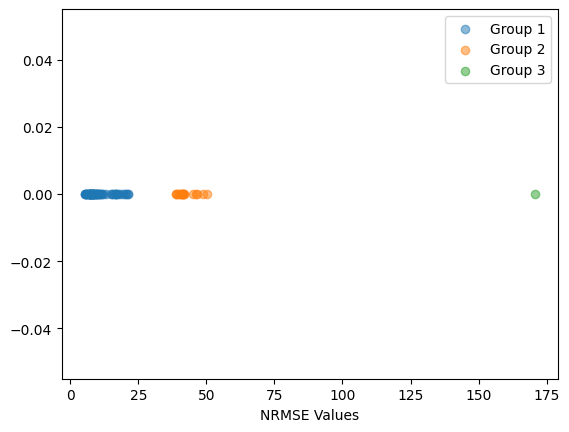

In [16]:
plt.scatter(group1['nrmse_daily'], np.zeros_like(group1['nrmse_daily']), label='Group 1', alpha=0.5)
plt.scatter(group2['nrmse_daily'], np.zeros_like(group2['nrmse_daily']), label='Group 2', alpha=0.5)
plt.scatter(group3['nrmse_daily'], np.zeros_like(group3['nrmse_daily']), label='Group 3', alpha=0.5)
plt.xlabel('NRMSE Values')
plt.legend()
plt.show()

In [18]:
validation_metrics.sort_values('nrmse_daily')

,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,nrmse_hourly,valid_data_pairs_daily,valid_data_pairs_hourly,Cluster
badajoz,-0.353483,0.607400,2.148065,5.257688,NaN,2177,NaN,0
arenosillo,-2.129203,2.155346,2.799792,5.431103,NaN,2166,NaN,0
valencia_arpt,0.568136,0.645825,2.456369,5.576252,NaN,2167,NaN,0
valladolid,-0.299422,0.753352,2.453723,5.734655,NaN,2187,NaN,0
huelva,-0.183329,0.472007,2.664880,5.791148,NaN,2126,NaN,0
...,...,...,...,...,...,...,...,...
leinefelde,4.983344,4.983344,8.441586,46.180829,22.857096,4779,4155.0,1
cornale,11.104173,13.940949,16.348921,46.716771,30.732195,32736,29315.0,1
görlitz,3.507147,6.180319,14.219644,48.730371,17.412030,33452,29128.0,1
hamburg_fuhlsbüttel,3.491350,9.117976,22.808131,50.254524,17.598130,33399,29600.0,1


In [20]:
ticket_path = Path.home()/"OneDrive-3E/Research/Solar/tickets/2024/IN3043_accuracy_factors_analysis"
complexity = pd.read_csv(os.path.join(ticket_path, 'complexity.csv'), index_col=0)
complexity

,country,latitude,longitude,altitude,provider,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,tpi_5km,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification
station_name,,,,,,,,,,,,,,,,
camborne,United Kingdom,50.22,-5.32,88.0,bsrn,_flat plains,1.6250,2.875,2.875,0.2500,0.125,0.0,3.211302,Cfb,68.509617,C
carpentras,France,44.08,5.06,100.0,bsrn,_flat plains,1.5000,2.000,1.375,0.0000,0.000,0.0,57.987479,Cfb,84.703463,C
budapest_lorinc,Hungary,47.43,19.18,139.0,bsrn,_flat plains,2.1250,1.375,1.500,0.1875,0.000,0.0,482.028360,Cfb,73.573263,C
magurele_mars,Romania,44.34,26.01,110.0,bsrn,_flat plains,0.8125,0.750,0.875,0.0000,0.000,0.0,198.059538,Cfa,76.351207,C
cabauw,Netherlands,51.97,4.93,0.0,bsrn,_flat plains,0.7500,0.500,0.500,0.0625,0.000,0.0,49.955084,Cfb,70.044037,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,Ireland,53.43,-6.23,82.0,wrdc,_flat plains,1.5000,1.250,1.125,-0.1250,0.125,0.0,4.175609,Cfb,64.296802,C
grossenzersdorf,Austria,48.20,16.57,157.0,wrdc,_flat plains,1.0000,1.125,1.125,0.0625,0.000,0.0,357.351298,Cfb,71.090746,C
gonzaga,Italy,44.96,10.77,16.0,lombardy,_flat plains,0.8750,1.125,1.000,0.0000,0.000,0.0,117.377329,Cfa,78.808519,C


In [21]:
validation = validation_metrics.drop(['valid_data_pairs_daily', 'valid_data_pairs_hourly'], axis=1)

validation = complexity.merge(validation, how='inner', left_index=True, right_index=True)
validation = validation.drop(['country', 'provider'], axis=1)
validation

,latitude,longitude,altitude,terrain_classification,tri_1km,tri_5km,tri_10km,tpi_1km,tpi_5km,tpi_10km,distance_to_coastline_km,climate_zone,clearness (%),climate_classification,nmbe,nrmse_yearly,nrmse_monthly,nrmse_daily,nrmse_hourly,Cluster
camborne,50.22,-5.32,88.0,_flat plains,1.6250,2.875,2.875,0.2500,0.125,0.0,3.211302,Cfb,68.509617,C,-1.713271,2.390578,2.960226,20.515307,19.891331,0
carpentras,44.08,5.06,100.0,_flat plains,1.5000,2.000,1.375,0.0000,0.000,0.0,57.987479,Cfb,84.703463,C,-0.667623,0.908728,2.305455,11.637070,11.227009,0
budapest_lorinc,47.43,19.18,139.0,_flat plains,2.1250,1.375,1.500,0.1875,0.000,0.0,482.028360,Cfb,73.573263,C,-0.438789,0.516789,2.504264,15.510051,15.026375,0
magurele_mars,44.34,26.01,110.0,_flat plains,0.8125,0.750,0.875,0.0000,0.000,0.0,198.059538,Cfa,76.351207,C,-0.241528,0.241528,2.793683,13.151986,12.704396,0
cabauw,51.97,4.93,0.0,_flat plains,0.7500,0.500,0.500,0.0625,0.000,0.0,49.955084,Cfb,70.044037,C,-0.199198,0.609549,2.155886,16.649853,16.077524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dublin_arpt,53.43,-6.23,82.0,_flat plains,1.5000,1.250,1.125,-0.1250,0.125,0.0,4.175609,Cfb,64.296802,C,3.362028,3.494330,5.239870,9.972663,NaN,0
grossenzersdorf,48.20,16.57,157.0,_flat plains,1.0000,1.125,1.125,0.0625,0.000,0.0,357.351298,Cfb,71.090746,C,5.926388,6.072439,6.855718,9.840883,NaN,0
gonzaga,44.96,10.77,16.0,_flat plains,0.8750,1.125,1.000,0.0000,0.000,0.0,117.377329,Cfa,78.808519,C,-6.679113,6.724571,7.997686,38.823848,16.058042,1
landriano,45.32,9.27,88.0,_flat plains,0.8750,0.875,0.875,0.0000,0.000,0.0,105.966234,Cfa,78.543263,C,-0.069454,1.363417,3.209997,38.937531,12.993406,1


In [22]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(validation, geometry=[Point(xy) for xy in zip(validation['longitude'], validation['latitude'])])

geojson_str = gdf.to_json()
print(geojson_str)

{"type": "FeatureCollection", "features": [{"id": "camborne", "type": "Feature", "properties": {"Cluster": 0, "altitude": 88.0, "clearness (%)": 68.50961707613644, "climate_classification": "C", "climate_zone": "Cfb", "distance_to_coastline_km": 3.211301963230615, "latitude": 50.22, "longitude": -5.32, "nmbe": -1.7132705783639728, "nrmse_daily": 20.51530707180036, "nrmse_hourly": 19.891330842912414, "nrmse_monthly": 2.9602256138049303, "nrmse_yearly": 2.390577745010077, "terrain_classification": "_flat plains", "tpi_10km": 0.0, "tpi_1km": 0.25, "tpi_5km": 0.125, "tri_10km": 2.875, "tri_1km": 1.625, "tri_5km": 2.875}, "geometry": {"type": "Point", "coordinates": [-5.32, 50.22]}}, {"id": "carpentras", "type": "Feature", "properties": {"Cluster": 0, "altitude": 100.0, "clearness (%)": 84.70346336962042, "climate_classification": "C", "climate_zone": "Cfb", "distance_to_coastline_km": 57.987478793798985, "latitude": 44.08, "longitude": 5.06, "nmbe": -0.6676226662091644, "nrmse_daily": 11.6

In [24]:
gdf.to_file(os.path.join(ticket_path, 'group.geojson'), driver="GeoJSON")  


/home/lhn3e/envs/lhn_internship/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
